In [1]:
# Standard Imports
import numpy as np
from time import time
from matplotlib import pyplot as plt
import os


from pyspecter.SPECTER import SPECTER
from pyspecter.Observables import Observable
# from pyspecter.SpecialObservables import SpecialObservables

# Utils
from pyspecter.utils.data_utils import load_cmsopendata, load_triangles
# from pyspecter.utils.plot_utils import newplot, plot_event, hist_with_errors, hist_with_outline, stamp
from rikabplotlib.plot_utils import newplot, hist_with_errors, hist_with_outline


# SPECTER
from pyspecter.SpectralEMD_Helper import compute_spectral_representation

2024-04-03 00:34:57.384903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [2]:
studies = ["diskiness", "lineliness", "ringiness", "1-spronginess", "2-spronginess", "3-spronginess"]
dataset = "cmsopendata"

R = 0.5


def load_data(study, dataset):

    current_working_directory = os.getcwd()

    data_string = f"{dataset}"
    if "spronginess" in study:
        data_string = f"{dataset}_{study[0]}"
        study = "n_subjettiness"
        

    specter_params_string = f"{data_string}_params.npy"
    closed_form_params_string = f"{data_string}_closed_form_params.npy"
    shaper_params_string = f"{data_string}_shaper_params.npy"

    specter_emds_string = f"{data_string}_sEMDs.npy"
    closed_form_emds_string = f"{data_string}_closed_form_sEMDs.npy"
    shaper_emds_string = f"{data_string}_shaper_EMDs.npy"

    print(f"Loading {study} data from {os.path.join(current_working_directory, study, specter_emds_string)}...")



    try:
        specter_emds = np.load(os.path.join(current_working_directory, study, specter_emds_string), allow_pickle=True)
    except FileNotFoundError:
        specter_emds = None
        print(f"File {specter_emds_string}  not found!")


    try:
        specter_params = np.load(os.path.join(current_working_directory, study, specter_params_string), allow_pickle=True)
    except FileNotFoundError:
        specter_params = None
        print(f"File {specter_params_string}  not found!")


    try:
        closed_form_emds = np.load(os.path.join(current_working_directory, study, closed_form_emds_string), allow_pickle=True)
    except FileNotFoundError:
        closed_form_emds = None
        print(f"File {closed_form_emds_string}  not found!")

    try:
        closed_form_params = np.load(os.path.join(current_working_directory, study, closed_form_params_string), allow_pickle=True)
    except FileNotFoundError:
        closed_form_params = None
        print(f"File {closed_form_params_string}  not found!")

    try:
        shaper_emds = np.load(os.path.join(current_working_directory, study, shaper_emds_string), allow_pickle=True)
    except FileNotFoundError:
        shaper_emds = None
        print(f"File {shaper_emds_string}  not found!")

    try:
        shaper_params = np.load(os.path.join(current_working_directory, study, shaper_params_string), allow_pickle=True)
    except FileNotFoundError:
        shaper_params = None
        print(f"File {shaper_params_string}  not found!")
        


    return specter_emds, specter_params, closed_form_emds, closed_form_params, shaper_emds, shaper_params

In [3]:
alpha_s = 0.12
C_F = 4/3
C_A = 3
T_R = 0.5
n_f = 5


def theta_ringiness(z, R_opt, R = 0.5):

    t = 2 * R * np.sin(z[None,:] * (1-z[None,:]) * np.pi) - np.pi * R_opt[:,None]
    return t > 0

def theta_lineliness(z, L_opt, R = 0.5):

    t = 12 * R * (1-z) * z * (1 - 2/3 * np.sqrt(2 * z * (1-z))) -  L_opt[:,None]
    return t > 0

def quark_splitting_function(z):

    return C_F * (1 + (1-z)**2) / z

def gluon_splitting_function(z):

    return C_A * (1-z) / z + C_A * (1-z)/z + C_A * z * (1-z) + T_R * n_f * (1-z)**2


def integral(param_opt, theta, n = 1000):

    z = np.random.uniform(0, 1, size = n)
    probability = 0.5 * quark_splitting_function(z) + 0.5 * gluon_splitting_function(z)
    t = theta(z, param_opt)

    integral = alpha_s / np.pi * np.sum(probability * t, axis = -1)
    integral_error = alpha_s / np.pi * np.sqrt(np.sum(probability**2 * t**2, axis = -1) / n)
    return integral, integral_error




Loading ringiness data from /home/rikab/Documents/Research/SPECTER/Studies/ringiness/cmsopendata_sEMDs.npy...
[0.01401699 0.00952096 0.00502204 ... 0.00389327 0.00604507 0.00902797]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


Loading diskiness data from /home/rikab/Documents/Research/SPECTER/Studies/diskiness/cmsopendata_sEMDs.npy...
[0.01401699 0.00952096 0.00502204 ... 0.00389327 0.00604507 0.00902797]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


Loading lineliness data from /home/rikab/Documents/Research/SPECTER/Studies/lineliness/cmsopendata_sEMDs.npy...
[0.00495231 0.00372879 0.00096667 ... 0.00101641 0.00211979 0.00394377]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


Loading n_subjettiness data from /home/rikab/Documents/Research/SPECTER/Studies/n_subjettiness/cmsopendata_1_sEMDs.npy...
File cmsopendata_1_params.npy  not found!
File cmsopendata_1_closed_form_sEMDs.npy  not found!
File cmsopendata_1_closed_form_params.npy  not found!
!!!
[0.10135023 0.02449834 0.03238634 ... 0.01949228 0.01734413 0.02097856]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


Loading n_subjettiness data from /home/rikab/Documents/Research/SPECTER/Studies/n_subjettiness/cmsopendata_2_sEMDs.npy...
File cmsopendata_2_params.npy  not found!
File cmsopendata_2_closed_form_sEMDs.npy  not found!
File cmsopendata_2_closed_form_params.npy  not found!
[0.01030861 0.00981421 0.00759098 ... 0.00454412 0.00342412 0.00587875]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


Loading n_subjettiness data from /home/rikab/Documents/Research/SPECTER/Studies/n_subjettiness/cmsopendata_3_sEMDs.npy...
File cmsopendata_3_params.npy  not found!
File cmsopendata_3_closed_form_sEMDs.npy  not found!
File cmsopendata_3_closed_form_params.npy  not found!
[0.00291541 0.00114998 0.00167126 ... 0.00182153 0.0013913  0.00128079]


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/rikabplotlib/plot_utils.py:164: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(bin_centers[hist > 0], hist[hist > 0], np.sqrt(errs2[hist > 0]), xerr = bin_widths[hist > 0] / 2, fmt = "o", label = label, **kwargs)


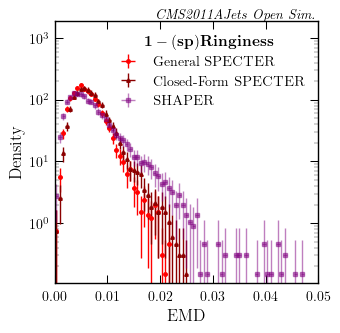

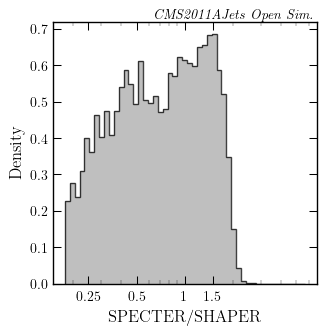

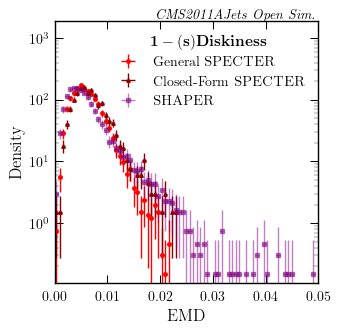

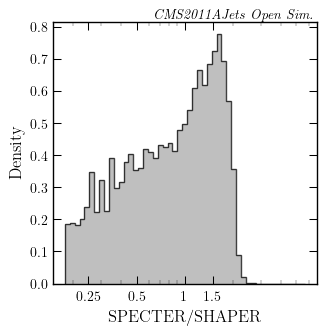

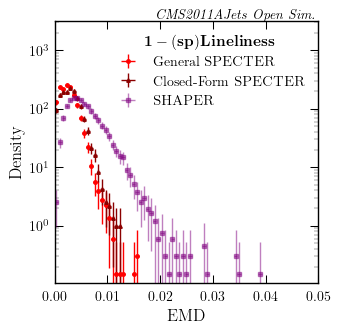

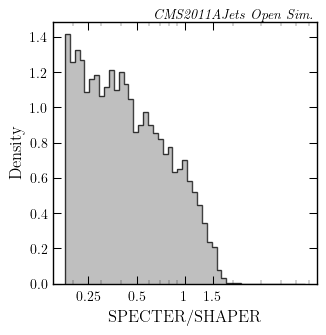

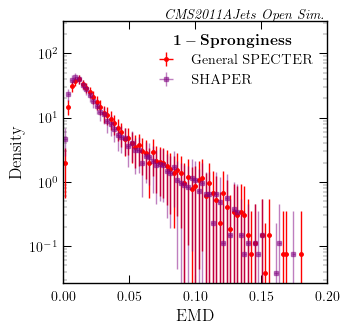

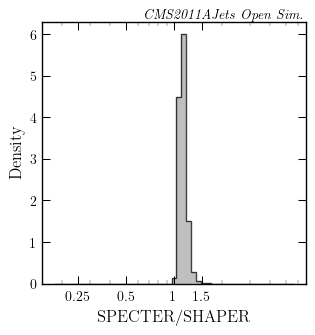

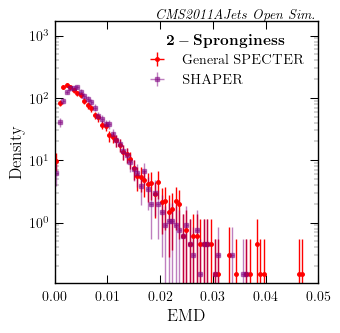

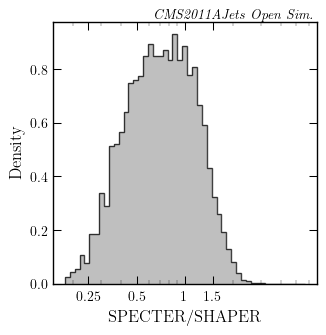

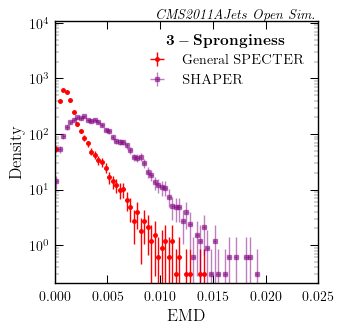

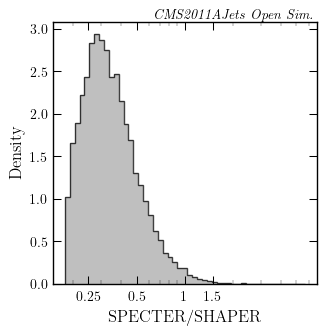

In [16]:
def make_plots(study, dataset, name, parameter_name, emd_range = [0,0.05], parameter_range = [0,1], n_bins = 75, theta = None):

    # Load the data
    specter_emds, specter_params, closed_form_emds, closed_form_params, shaper_emds, shaper_params = load_data(study, dataset)

    if study == "1-spronginess":
        print("!!!")
        shaper_emds = shaper_emds * 2

    # Plot the EMDs
    fig, ax = newplot("column", stamp=r"\it{CMS2011AJets Open Sim.}")

    print(specter_emds)

    hist_with_errors(ax, specter_emds, n_bins, emd_range, label=r"General $\textsc{SPECTER}$", color = "red", density=True, marker = "o")
    
    try:
        hist_with_errors(ax, closed_form_emds, n_bins, emd_range, label=r"Closed-Form $\textsc{SPECTER}$", color = "darkred", density=True, marker = "^")
    except:
        pass
    
    hist_with_errors(ax, 2 * shaper_emds, n_bins, emd_range, label=r"$\textsc{SHAPER}$", color = "purple", density=True, marker = "s", alpha = 0.5)




    plt.yscale("log")

    # Extend the y axis so that there is 10% space between the top of the plot
    ymin, ymax = plt.ylim()
    amount = 0.35
    if plt.gca().get_yscale() == 'log':
        y_min, y_max = np.log10(ymin), np.log10(ymax)
        plt.ylim(np.power(10, y_min), np.power(10, y_max * (1 + amount)))
    else:
        plt.ylim(ymin, ymax * (amount + 1))
    plt.xlim(emd_range)

    plt.xlabel(r"$\mathrm{EMD}$")
    plt.ylabel(r"$\mathrm{Density}$")
    plt.legend(title = r"$\bf{%s}$" % name, loc = "upper right")

    plt.savefig(f"Plots/{study}_EMD_{dataset}.pdf", bbox_inches = "tight")


    # Scatterplot of the EMDs
    fig, ax = newplot("column", stamp=r"\it{CMS2011AJets Open Sim.}")
    # ax.scatter(specter_emds, closed_form_emds, label = r"General $\textsc{SPECTER}$", color = "red", marker = "o")
    # ax.hist( 2 * shaper_emds / specter_emds, bins = np.logspace(-0.5, 0.5, 100))
    hist_with_outline(ax, specter_emds / shaper_emds / 2, np.logspace(-0.75, 0.75), [0.1, 1.75], color = "black", density = True)
    plt.xscale("log")

    # include more x axis ticks and labels
    plt.xticks([0.25, 0.5, 1, 1.5], [0.25, 0.5, 1, 1.5])


    plt.xlabel(r"$\mathrm{SPECTER /SHAPER}$")
    plt.ylabel(r"$\mathrm{Density}$")

    plt.savefig(f"Plots/{study}_Ratio_{dataset}.pdf", bbox_inches = "tight")

    
    


    # # Plot the parameters
    # fig, ax = newplot("column", stamp=r"\it{CMS2011AJets Open Sim.}")

    
    # hist_with_errors(ax, specter_params, n_bins, parameter_range, label=r"General $\textsc{SPECTER}$", color = "red", density=True, marker = "o")
    # hist_with_errors(ax, closed_form_params, n_bins, parameter_range, label=r"Closed-Form $\textsc{SPECTER}$", color = "darkred", density=True, marker = "^")
    # hist_with_errors(ax, shaper_params, n_bins, parameter_range, label=r"$\textsc{SHAPER}$", color = "purple", density=True, marker = "s", alpha = 0.5)

    # # L.O. Analytic Solution
    # if theta is not None:
    #     param_opt = np.linspace(*parameter_range, 1000)
    #     probs, error = integral(param_opt, theta)


    #     # Normalize the probability 
    #     probs /= np.trapz(probs, param_opt)

    #     plt.plot(param_opt, probs, label = r"L.O. $\textsc{SPECTER}$ Pred.", color = "black", lw = 2, ls = "--")
    #     plt.fill_between(param_opt, probs - error, probs + error, color = "black", alpha = 0.2)


    # plt.yscale("log")

    # # Extend the y axis so that there is 10% space between the top of the plot
    # ymin, ymax = plt.ylim()
    # amount = 1.5
    # if plt.gca().get_yscale() == 'log':
    #     plt.ylim(y_min, ymax * np.power(10, amount))
    # else:
    #     plt.ylim(ymin, ymax * (amount + 1))
    # plt.xlim(parameter_range)

    # plt.xlabel(r"$\mathrm{%s}$" % parameter_name)
    # plt.ylabel(r"$\mathrm{Density}$")

    # plt.legend(title = r"$\bf{%s}$" % name, loc = "upper right")

    # plt.savefig(f"Plots/{study}_Parameters_{dataset}.pdf", bbox_inches = "tight")


make_plots("ringiness", "cmsopendata", "1-(sp)Ringiness", parameter_name = "Radius", parameter_range=[0,0.5], theta = theta_ringiness)
make_plots("diskiness", "cmsopendata", "1-(s)Diskiness", parameter_name = "Radius", parameter_range=[0,0.5], theta = None)
make_plots("lineliness", "cmsopendata", "1-(sp)Lineliness", parameter_name = "Length", parameter_range=[0,1.25], theta = theta_lineliness)
make_plots("1-spronginess", "cmsopendata", "1-Spronginess", parameter_name = "Radius", emd_range = [0,0.2], parameter_range=[0,0.75], theta = None)
make_plots("2-spronginess", "cmsopendata", "2-Spronginess", parameter_name = "Radius", parameter_range=[0,0.5], theta = None)
make_plots("3-spronginess", "cmsopendata", "3-Spronginess", parameter_name = "Radius", emd_range = [0,0.025], parameter_range=[0,0.5], theta = None)

    